In [41]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay  

In [2]:
df = pd.read_csv("Dosi-NonBu 토양 예측 데이터.csv")
df.shape # (rows, columns)

(1671, 11)

In [3]:
df

,월,일,위도,경도,누적 평균 습도(%),누적 평균 기온(°C),누적 평균 풍속(m/s),누적 평균 지면온도(°C),누적 평균 일 순복사(MJ/m2),지난 일 수,Target
0,7,10,33.25992,126.48917,75.333333,27.000000,0.600000,31.60,16.354490,0,False
1,7,11,33.25992,126.48917,76.833333,27.150000,0.700000,31.30,14.207245,1,False
2,7,12,33.25992,126.48917,79.888889,27.166667,0.683333,30.90,12.464830,2,False
3,7,13,33.25992,126.48917,80.666667,27.350000,0.825000,31.05,12.536122,3,False
4,7,14,33.25992,126.48917,80.533333,27.600000,0.790000,31.56,13.168898,4,False
...,...,...,...,...,...,...,...,...,...,...,...
1666,9,18,35.02330,126.94961,96.833333,21.000000,0.925000,23.10,3.065000,1,True
1667,10,5,35.02330,126.94961,87.666667,20.500000,2.200000,22.50,8.310000,0,False
1668,10,6,35.02330,126.94961,83.833333,19.300000,1.575000,22.15,10.350000,1,True
1669,3,15,35.02330,126.94961,98.666667,13.100000,1.500000,11.80,1.150000,0,False


In [4]:
df.describe()

,월,일,위도,경도,누적 평균 습도(%),누적 평균 기온(°C),누적 평균 풍속(m/s),누적 평균 지면온도(°C),누적 평균 일 순복사(MJ/m2),지난 일 수
count,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000
mean,6.738480,16.064632,36.315268,127.326332,74.986095,17.939496,1.333886,20.387874,15.644811,4.631957
std,2.548537,8.923394,1.155705,0.403662,11.238870,8.997814,0.673983,9.242601,9.037722,3.736265
min,1.000000,1.000000,33.259920,126.489170,26.333333,-10.250000,0.200000,-4.150000,-0.890000,0.000000
25%,5.000000,8.000000,35.938070,126.992520,66.732143,14.575000,0.881932,16.720536,11.889722,2.000000
50%,7.000000,16.000000,36.724550,127.250240,77.333333,19.850000,1.180000,22.400000,15.192727,4.000000
75%,8.000000,24.000000,36.724550,127.466880,83.073232,24.700000,1.625000,26.915000,18.729667,7.000000
max,12.000000,31.000000,38.201600,128.683400,100.333333,30.320000,9.650000,36.033333,102.760000,18.000000


## 초기 모델 학습 및 테스트

In [5]:
X = df.drop("Target",axis=1)
y = df["Target"]

In [6]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_score={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [8]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

D:\GitLocal\Machine-Learing-Data-Science\Dosi-NongBu-Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8955223880597015,
 'KNN': 0.8925373134328358,
 'Random Forest': 0.8835820895522388}

In [9]:
knn_grid={"n_neighbors": range(1,21)}

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

## KNN

In [10]:
np.random.seed(42)

rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions=knn_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': range(1, 21)},
                   verbose=True)

In [11]:
rs_knn.best_params_

{'n_neighbors': 14}

In [12]:
rs_knn.score(X_test, y_test)

0.8985074626865671

## Logistic Regression

In [13]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [14]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0018329807108324356}

In [15]:
rs_log_reg.score(X_test, y_test)

0.8985074626865671

## Random Forest

In [16]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [17]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [18]:
rs_rf.score(X_test, y_test)

0.8955223880597015

# Logistic Regression Hyperparameters Tuning

In [34]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [35]:
gs_log_reg.best_params_

{'C': 0.002395026619987486, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(X_test, y_test)

0.8955223880597015

In [37]:
y_preds = gs_log_reg.predict(X_test)

In [38]:
y_preds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [39]:
y_test

438     False
570     False
567     False
534     False
1616    False
        ...  
1422    False
1235    False
163     False
513     False
1261    False
Name: Target, Length: 335, dtype: bool

Text(0, 0.5, 'True Positive Rate')

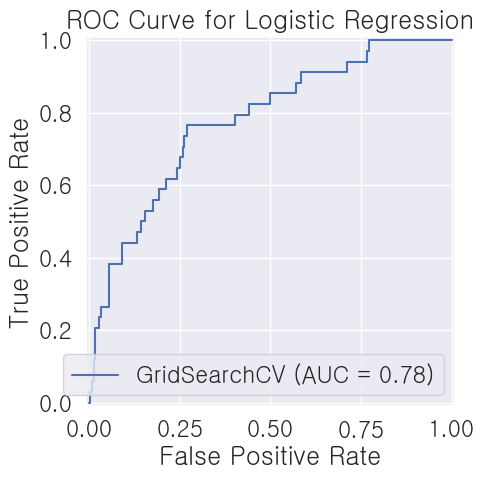

In [40]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [42]:
print(confusion_matrix(y_test, y_preds))

[[300   1]
 [ 34   0]]


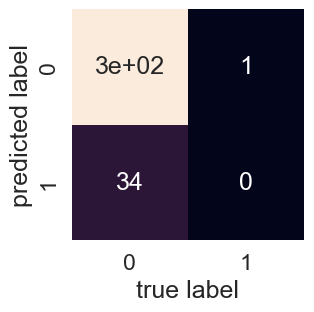

In [43]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [44]:
gs_log_reg.best_params_

{'C': 0.002395026619987486, 'solver': 'liblinear'}

In [45]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [46]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [47]:
clf.fit(X_train, y_train);

In [48]:

clf.coef_

array([[-0.0097554 , -0.00047678,  0.21160016, -0.07841132, -0.00722983,
        -0.16477105,  0.03013874,  0.13309055,  0.00551317,  0.18442868]])

In [49]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'월': -0.009755403271703633,
 '일': -0.00047678278844834636,
 '위도': 0.2116001565506368,
 '경도': -0.07841131585784235,
 '누적 평균 습도(%)': -0.007229829728932962,
 '누적 평균 기온(°C)': -0.1647710464454214,
 '누적 평균 풍속(m/s)': 0.030138744311838883,
 '누적 평균 지면온도(°C)': 0.1330905483329681,
 '누적 평균 일 순복사(MJ/m2)': 0.005513166592423865,
 '지난 일 수': 0.1844286774460117}

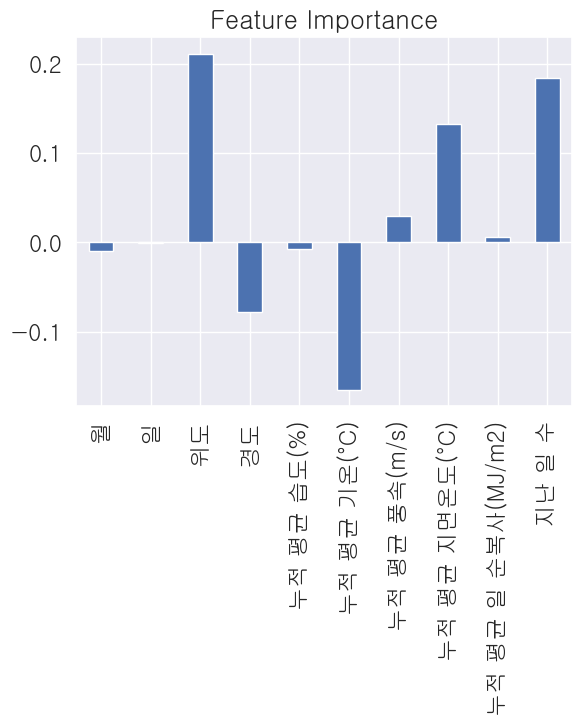

In [50]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [51]:
model_scores, rs_knn.score(X_test, y_test), rs_log_reg.score(X_test, y_test), rs_rf.score(X_test, y_test), gs_log_reg.score(X_test, y_test)

({'Logistic Regression': 0.8955223880597015,
  'KNN': 0.8925373134328358,
  'Random Forest': 0.8835820895522388},
 0.8985074626865671,
 0.8985074626865671,
 0.8955223880597015,
 0.8955223880597015)

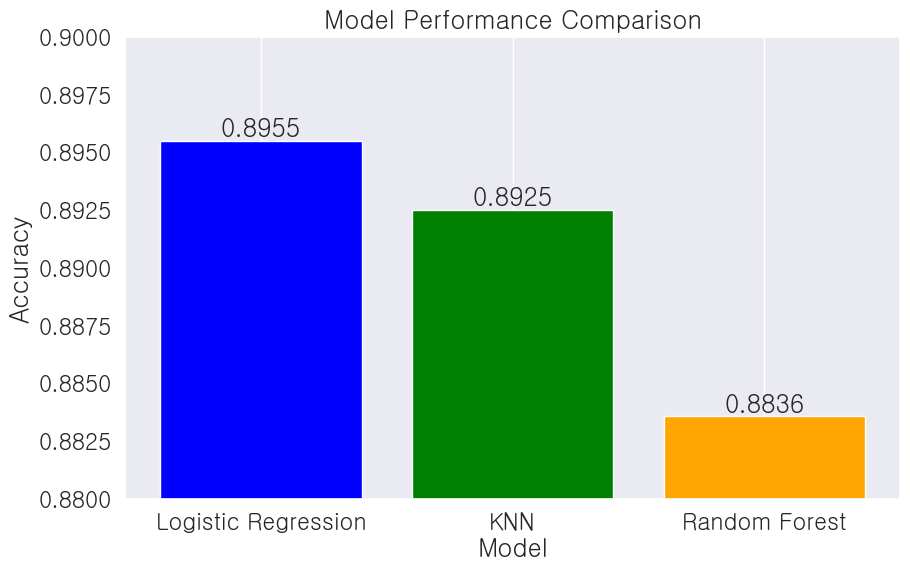

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# 모델 성능 데이터
performance_dict = {
    'Logistic Regression': 0.8955,
    'KNN': 0.8925,
    'Random Forest': 0.8836
}

# 데이터프레임 생성
performance_df = pd.DataFrame(list(performance_dict.items()), columns=['Model', 'Accuracy'])

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['Accuracy'], color=['blue', 'green', 'orange'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.88, 0.90)  # y축 범위를 성능 범위에 맞게 조정
plt.grid(axis='y')

# 정확도 값을 막대 위에 표시
for index, value in enumerate(performance_df['Accuracy']):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

plt.show()
